In [2]:
import random
%matplotlib inline
import matplotlib.pyplot as plt
import torch

根据带有噪声的线性模型构造一个人造数据集.使用线性模型参数
$ w= [2,-3.4]^T$     $b = 4.2$和噪声像$\epsilon$生成数据集及其标签
$ y = Xw +b + \epsilon$

In [3]:
def synthetic_data(w, b, num_examples):
    """
    合成数据,人工制作数据
    :param w: 超参数 手动定义的线性模型参数
    :param b: 偏置
    :param num_examples:生成的样本数量
    :return:
    """
    X = torch.normal(0, 1, (num_examples, len(w)))  # X是一个均值为0,方差为1的随机数,shape =  (num_examples, len(w))
    y = torch.matmul(X, w) + b
    epsilon = torch.normal(0, 0.01, y.shape)  # 随机取得一个一个噪声
    y += epsilon
    return X, y.reshape((-1, 1)) # reshape 的-1表示为自动计算,1表示固定值

```python
torch.normal(means, std, shape)
```
means (Tensor) – 均值,包含每个输出元素相关的正态分布的均值。
std (Tensor) – 标准差,包含每个输出元素相关的正态分布的标准差。

返回一个张量，包含从给定参数means,std的离散正态分布中抽取随机数。
均值和标准差的形状不须匹配，但每个张量的元素个数须相同。


### 生成数据集

In [7]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
# features.shape = 1000,2

### 画图展示

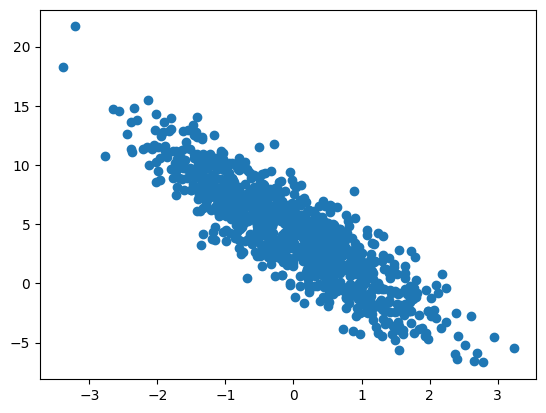

In [5]:
# 展示标签与第二个特征的关系,近似于y=-3.4x
plt.scatter(features[:,1],labels)

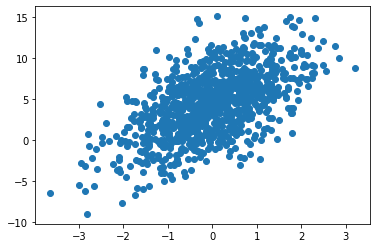

In [22]:
# 展示标签与第一个特征的关系,近似于y=2x
plt.scatter(features[:,0],labels)

定义一个data_iter函数,用于随机筛选
该函数接受批量大小,特征矩阵和标签向量作为输入,生成大小为batch_size的小批量

In [23]:
def data_iter(batch_size, features, labels):
    """
    从多个样本中,随机筛选出一部分组成一个batch
    :param batch_size: 一个batch中包含样本的个数
    :param features:
    :param labels:
    :return:
    """
    num_examples = len(features)
    indices = list(range(num_examples)) 
    random.shuffle(indices)
    indices = indices[:batch_size]  # 打乱顺序
    return features[indices], labels[indices]

# batch_size = 10
# new_features, new_labels = data_iter(batch_size, features, labels)
# print(new_features,"\n",new_labels)

### 初始化模型参数

In [24]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)# 偏差是一个标量

### 定义模型

In [25]:
def linreg(X, w, b):
    """
    线性回归模型
    :param X:
    :param w:
    :param b:
    :return:
    """
    return torch.matmul(X, w) + b

### 定义Loss函数

In [26]:
def squared_loss(y_hat, y):
    """
    计算损失值,均方差损失函数
    """
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

### 定义优化算法

In [27]:
def sgd(params, lr, batch_size):
    """
    Small Gradient Descent
    小批量随机梯度下降
    :param params: 给定的参数 w 和b
    :param lr: 学习率  learnRate
    :param batch_size:
    :return:
    """
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size  # 除以batch_size是因为我们是对整个进行求和,需要进行归一化处理
            param.grad.zero_()

### 训练过程

In [28]:
lr = .03
num_epochs = 3
net = linreg # 定义使用什么网络
loss = squared_loss #定义使用什么损失函数
for epoch in range(num_epochs):
    for X,y in data_iter(batch_size= 10, features= features,labels=labels)

In [1]:
import numpy as np
import torch

# 构造一组数据集
x_values = [i for i in range(11)]
x_train = np.array(x_values,dtype=np.float32)
x_train = x_train.reshape(-1,1)
x_train

/Users/zane/miniforge3/envs/torch/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


array([[ 0.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.]], dtype=float32)

In [2]:
# 构造y = 2x+1
y_values = [2*i+1 for i in x_values]
y_train = np.array(y_values,dtype=np.float32)
y_train = y_train.reshape(-1,1)
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

In [3]:
import torch
import torch.nn as nn

In [4]:
class linearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(linearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

        def forward(self, x):
            out = self.linear(x)
            return out


input_dim = 1
output_dim = 1

model = linearRegressionModel(1, 1)
model

linearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [7]:
epoches = 1000
lr = .01
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
loss = nn.MSELoss()
inputs = torch.tensor(x_train)
labels = torch.tensor(y_train)
inputs

tensor([[ 0.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.]])

In [8]:
for epoch in range(epoches):
    epoch += 1
    inputs = torch.tensor(x_train)
    labels = torch.tensor(y_train)

    optimizer.zero_grad()
    outputs = model(inputs)
    loss = loss(outputs, labels)
    loss.backward()
    optimizer.step()
    if epoch % 50 == 0:
        print(f"epoch:{epoch} loss:{loss}")

NotImplementedError: 